# **Improvements in Heart Disease Related Deaths** [1]


* Nimra Rehman
* 100871702

*Analyzing data on heart disease related deaths in the US to identify any improvements made since 1999* [1]

## Introduction

Heart disease is the leading cause of death in the US and all around the world [4]. Every year, around 17.9 million people die from heart disease globally [4]. One-third of these deaths occur in people under the age of 70 [4]. Heart disease is linked to factors such as high blood pressure, obesity, physical inactivity, unhealthy diet, and consumption of alcohol and tobacco [4]. This assignment will explore whether heart disease-related deaths have decreased since 1999 in the US and which state has the highest heart disease related death rate. 


## Methods
### Data Collection


The data used in this report is from the National Center for Health Statistics. It is a data set of total deaths and age adjusted death rates for the top 10 leading causes of deaths in the US [8].

In [124]:
import pandas as pd
# Loads data set
df = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')

### Data Cleaning

To begin, the "113 Cause Name" got removed because there is already a column present that displays the cause of death. Next, rows that
have United States listed as a state in the State column got removed. Then the rows with District of Columbia listed as a state got removed. After, any cause of death other than heart disease got removed from the data set. In addtion, the "Cause Name" column got removed as all the data in the data set are deaths related to heart disease. The data cleaning process also involved getting rid of rows with null values and duplicate rows but none were present.

In [125]:
# Gets rid of the 113 Cause Name column from data set
df = df.drop('113 Cause Name', axis=1)
# Removes rows that have United States listed as a state
df = df[df['State'] != 'United States']
# Removes rows that have District of Columbia listed as a state
df = df[df['State'] != 'District of Columbia']
# Remove the other causes of deaths from the data set except Heart Disease
df = df[df['Cause Name'] == "Heart disease" ]
# Remove Cause Name Column as all the data is related to Heart Disease
df = df.drop('Cause Name', axis=1)
df

,Year,State,Deaths,Age-adjusted Death Rate
313,2017,Alabama,13110,223.2
314,2017,Alaska,814,135.0
315,2017,Arizona,12398,141.9
316,2017,Arkansas,8270,223.8
317,2017,California,62797,142.9
...,...,...,...,...
10655,1999,Virginia,15329,250.9
10656,1999,Washington,11515,215.7
10657,1999,West Virginia,6822,325.5
10658,1999,Wisconsin,13827,243.7


## Analysis

The summed_data dataframe has the cumalative death number and death rate for each individual State. This dataframe got created to aid with graphing.

In [126]:
import pandas as pd
# Created a data frame with sum of total deaths and age adjusted death rates for each year
# Used Chat GPT to figure out how to find the sum of Death numbers and Death Rate for each year in one data frame [2]
summed_data = df.groupby('Year').agg({'Deaths':'sum','Age-adjusted Death Rate':'sum'}).reset_index()
print(summed_data)

    Year  Deaths  Age-adjusted Death Rate
0   1999  723540                  12763.2
1   2000  709004                  12418.6
2   2001  698381                  12022.6
3   2002  695281                  11791.7
4   2003  683459                  11448.0
5   2004  650942                  10714.2
6   2005  650573                  10517.5
7   2006  630070                   9985.3
8   2007  614633                   9557.1
9   2008  615439                   9370.2
10  2009  598125                   8961.8
11  2010  596383                   8793.4
12  2011  595406                   8558.7
13  2012  598413                   8438.2
14  2013  609765                   8408.6
15  2014  613024                   8347.7
16  2015  632625                   8424.1
17  2016  633885                   8303.8
18  2017  646173                   8275.8


### Total Heart Disease Related Deaths for Each Year


The scatter plot shows that death have gone down since 2017. The number of deaths were very low between 2008 and 2012 and then started rising again. The low number of deaths between 2008 and 2012 could be attributed to the recession in the United States [5]. The recession caused heart disease deaths to go down due to factors such as less pollution, as well as people working less and having the time to take care of their health [5]. 

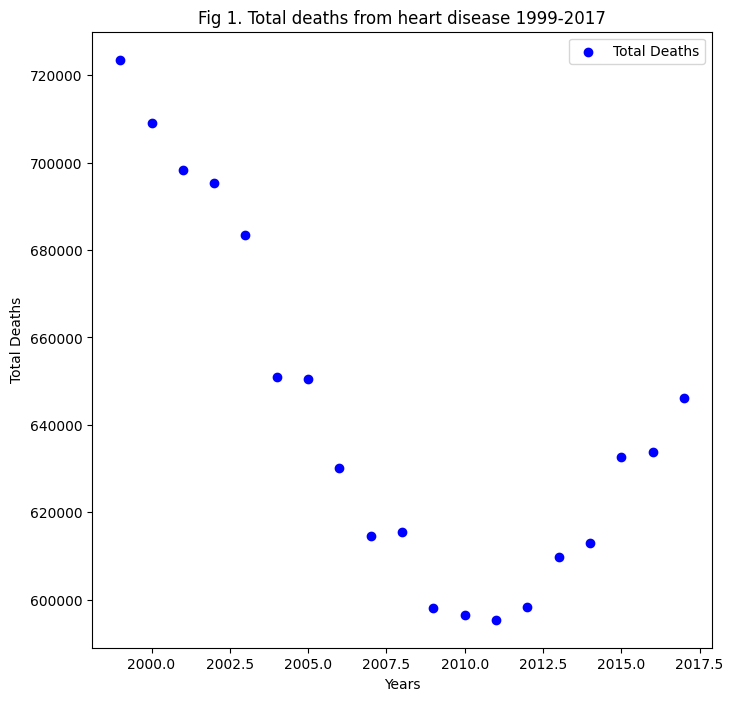

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(summed_data['Year'],summed_data['Deaths'],label = 'Total Deaths', color = 'blue')

plt.xlabel('Years')
plt.ylabel('Total Deaths')
plt.title('Fig 1. Total Deaths from Heart Disease 1999-2017')
plt.legend()
plt.show()

### Total Heart Disease Death Rate for Each Year 

The scatter plot shows that the total age adjusted death rate for each year since 1999 has gone significanlty. This can be attributed to less people smoking cigarretes and medications to lower high cholestrol [6].

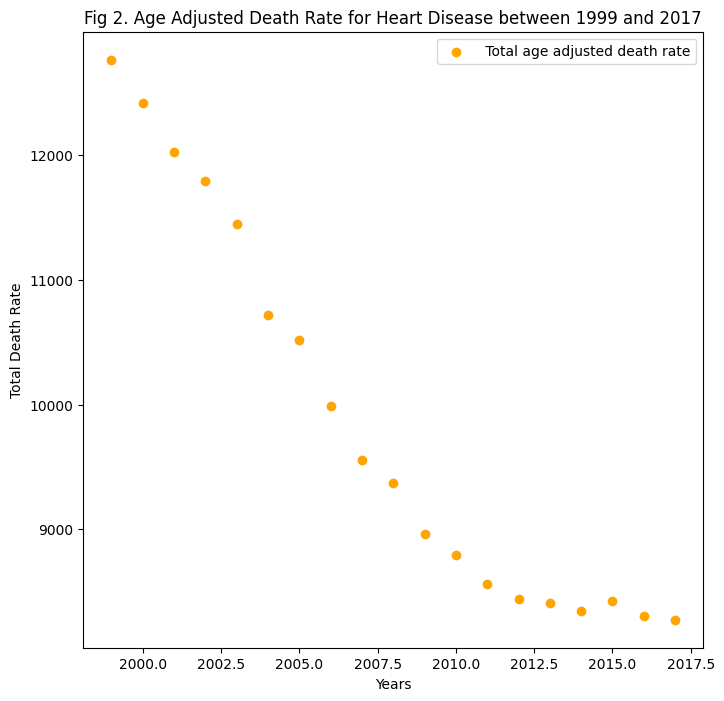

In [131]:
# Scatter plot for Total Age Adjusted Death Rate for Heart Disease between 1999 and 2017
plt.figure(figsize=(8,8))
plt.scatter(summed_data['Year'],summed_data[' Total Age-adjusted Death Rate'], label = " Total age adjusted death rate",color = 'orange')

plt.xlabel('Years')
plt.ylabel('Total Death Rate')
plt.title('Fig 2. Age Adjusted Death Rate for Heart Disease between 1999 and 2017')
plt.legend()
plt.show()

### Age Adjusted Death Rate for Each State in 2017

The death_rates_2017 dataframe has the states and it's total death rate in 2017. The dataframe will help in plotting.


In [129]:
death_rates_2017 = df[df['Year'] == 2017].groupby('State')['Age-adjusted Death Rate'].sum().reset_index()
death_rates_2017

,State,Age-adjusted Death Rate
0,Alabama,223.2
1,Alaska,135.0
2,Arizona,141.9
3,Arkansas,223.8
4,California,142.9
5,Colorado,122.7
6,Connecticut,141.6
7,Delaware,158.4
8,Florida,145.8
9,Georgia,175.8


From the bar graph it can be seen that Oklahoma has the highest death rate compared to the other states. This could be due to Oklahoma's population having an increase in obesity [7].

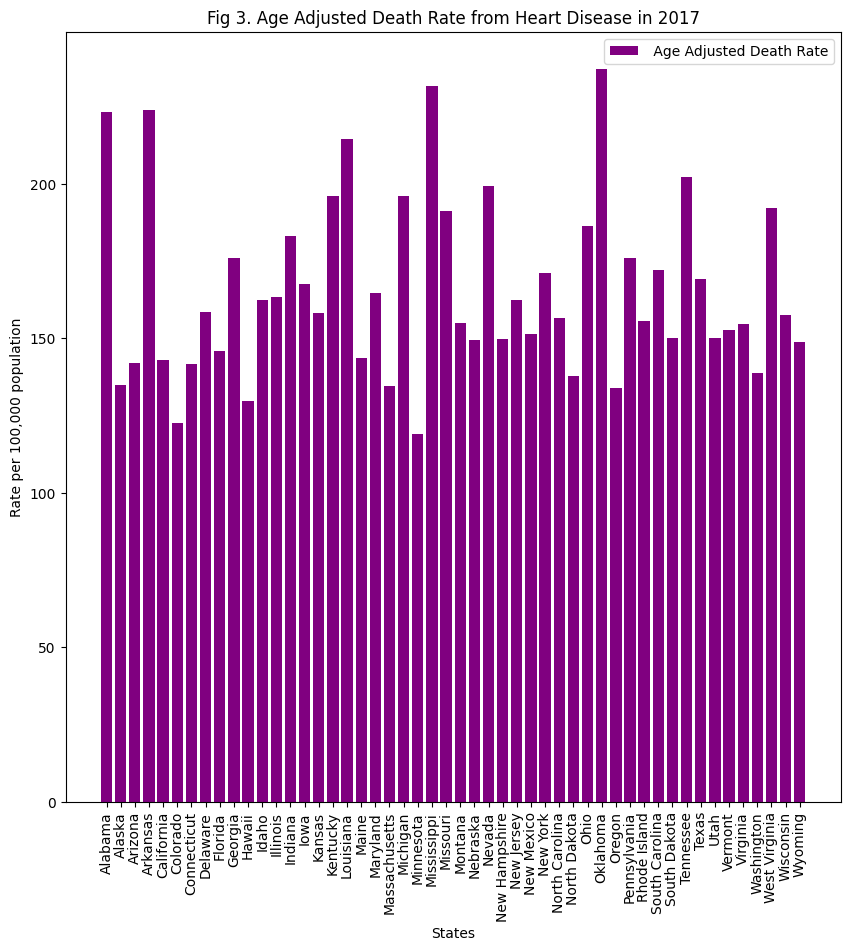

In [130]:
# Bar chart for Age Adjusted Death Rate from Heart Disease in 2017
plt.figure(figsize = (10,10))
plt.bar(death_rates_2017['State'],death_rates_2017['Age-adjusted Death Rate'], color = 'purple', label = " Age Adjusted Death Rate")
plt.xlabel('States')
plt.ylabel('Rate per 100,000 population')
plt.title('Fig 3. Age Adjusted Death Rate from Heart Disease in 2017')
# Used Chat GPT to rotate the State names for better readability [3]
plt.xticks(rotation = 90)
plt.legend()
plt.show()

## Discussion

In this assignment, data on heart disease related deaths were explored to see if the number of deaths and the rate of deaths decreased since 1999. In addition, the assignment also analyzed which US state had the highest death rate. It was found that total deaths each had gone down since 1999, and the number of deaths between 2008 and 2012 were the lowest, most likely due to the 2008 recession. Moreover, the death rate since 1999 had significantly gone down due to less smoking and improvements in medication. Furthermore, Oklahoma was the US state with the highest death rate in 2017. This is due to the population in Oklahoma having an increase in obesity. The outcomes of this assignment suggest that despite the number of deaths and the death rate decreasing since 1999, heart disease still remains a prominent cause of death in the US, and more funding needs to be put into its research and public awareness initiatives. Also, it is important to address the obesity problem in Oklahoma to effectively reduce the death rate.

## References

1. [1] ChatGPT, Coming up with the topic. OpenAI [Online]. https://chat.openai.com/share/97ec9e39-afaa-4691-8d3e-d48088527db0 (accessed November 28, 2023).
2. [2] ChatGPT, Groupby sum of death number and death rates. OpenAI [Online]. https://chat.openai.com/share/1947cc19-843c-4f8c-a1c4-374eb1a7cac7 (accessed November 28, 2023).
3. [3] ChatGPT, Rotate x-axis labels. OpenAI [Online]. https://chat.openai.com/share/25bc85b3-ad9b-4c73-beb9-193984b276dc (accessed November 28, 2023).
4. [4]	World Health Organization: WHO, “Cardiovascular diseases,” Jun. 11, 2019. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
5. [5]	D. Woods, “A bad economy can be good for your health,” NPR, Nov. 07, 2023. [Online]. Available: https://www.npr.org/transcripts/1197956718
6. [6]	G. A. Mensah et al., “Decline in cardiovascular mortality,” Circulation Research, vol. 120, no. 2, pp. 366–380, Jan. 2017, doi: 10.1161/circresaha.116.309115.
7. [7]	“OKC-County Health Department :: Heart disease.” https://www.occhd.org/myheart/heart-disease#:~:text=The%20number%20of%20deaths%20related,other%20state%20in%20the%20country.
8. Data Set: [8] “NCHS - Leading causes of Death: United States - catalog,” Apr. 21, 2022. https://catalog.data.gov/dataset/nchs-leading-causes-of-death-united-states

